### **1.Consumo di alcol per paese** 
Esegui un’**analisi esplorativa** focalizzata sul **consumo di alcol**.  
Analizza i seguenti aspetti:
* Visualizza i primi 10 paesi ordinati per total_litres_of_pure_alcohol (dal più alto)

* Calcola la media del consumo di birra, vino, e distillati

* Crea una nuova colonna alcohol_index che sia: `(beer_servings + wine_servings + spirit_servings) / 3`

* Trova il paese con il valore massimo di alcohol_index

* Filtra solo i paesi che consumano più di 100 birre all’anno

Crea un bar chart dei 10 paesi con più consumo totale (total_litres_of_pure_alcohol)

Crea un line plot con wine_servings ordinato per paese (usa sort_values)

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9  
Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')
-- 1 --
                country  beer_servings  spirit_servings  wine_servings  \
15              Belarus            142              373             42   
98            Lithuania            343              244             56   
3               Andorra            245    

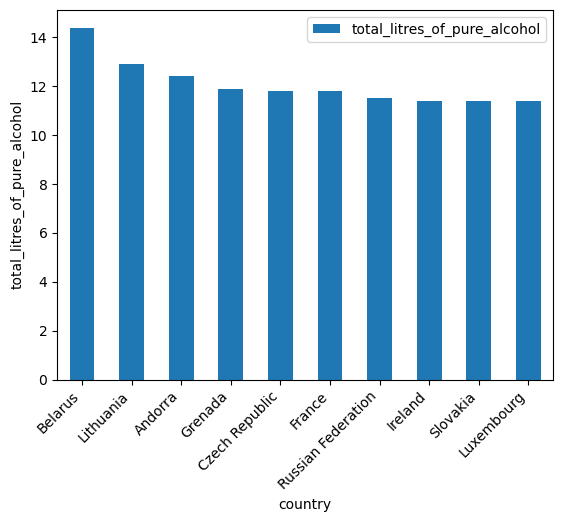

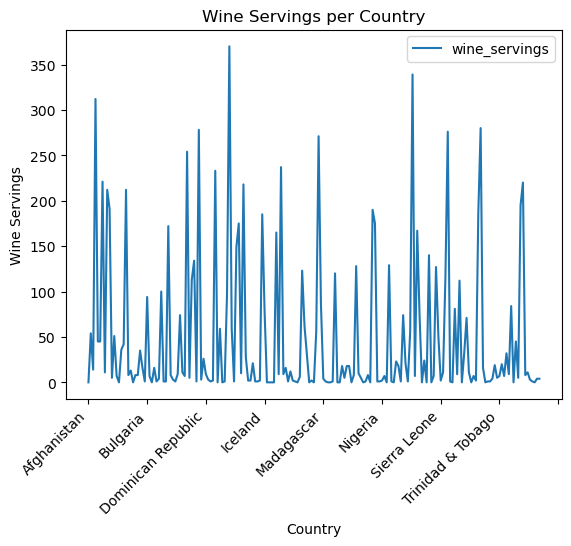

In [102]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
print(df.head().sort_index())
print(df.columns)
#1 
print("-- 1 --")

print(df.sort_values(by = ['total_litres_of_pure_alcohol'],ascending=False).head(n = 10))

#2
print("-- 2 --")

print(df[['beer_servings','spirit_servings','wine_servings']].mean())

#3
print("-- 3 --")
alcohol_index = df[['beer_servings','spirit_servings','wine_servings']].sum(axis=1)/3
df['alcohol_index'] = alcohol_index
print(df)

# 4
print("-- 4 --")
print(df.sort_values(by = ['alcohol_index'],ascending=False).head(n = 1))

# 5
print("-- 5 --")
print(df.loc[df['beer_servings'] > 100, ['country', 'beer_servings']])
# 6
print("-- 6 --")
import matplotlib.pyplot as plt
print(df[['total_litres_of_pure_alcohol','country']].sort_values(by='total_litres_of_pure_alcohol',ascending=False).head(10))
df[['total_litres_of_pure_alcohol','country']].sort_values(by='total_litres_of_pure_alcohol',ascending=False).head(10).plot(kind='bar',x='country',y='total_litres_of_pure_alcohol',xlabel='country',ylabel='total_litres_of_pure_alcohol')
plt.xticks(rotation=45,ha='right')
plt.show

# 7
print("-- 7 --")
df_sorted = df.sort_values(by='country')
df_sorted.plot(kind='line', x='country', y='wine_servings')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Country')
plt.ylabel('Wine Servings')
plt.title('Wine Servings per Country')
plt.show()


### **2.Analisi offerte di lavoro** 

Esegui un’**analisi esplorativa** focalizzata sui **lavori nel campo dei dati in ciascun paese**.  
Analizza i seguenti aspetti per ogni paese:

* Lo **stipendio medio annuale** (`salary_year_avg`)
* Il **numero totale di offerte di lavoro** (job count)
* L’intervallo degli stipendi: **valore minimo e massimo** (`min` / `max`)

Rappresenta graficamente lo stipendio medio (`salary_year_avg`) per `job_title_short` usando un grafico a barre orizzontali. Ordina i dati dallo stipendio più alto al più basso. Includi un titolo e le etichette per gli assi x e y.

In [ ]:
import pandas as pd
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])